In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/election_sentiment.csv')

In [ ]:
df.head()

,Unnamed: 0,state,Trump_Positive,Trump_Neutral,Trump_Negative,Biden_Positive,Biden_Neutral,Biden_Negative,state_abr,trump_pct,biden_pct,trump_vote,biden_vote,trump_win,biden_win
0,0,Alabama,54.595715,5.044921,40.359364,57.706627,4.839911,37.453462,AL,62.2,36.7,1441170,849624,1,0
1,1,Alaska,55.802469,5.679012,38.518519,60.388821,4.617254,34.993925,AK,53.1,43.0,189543,153502,1,0
2,2,Arizona,49.896212,4.436949,45.666840,59.984420,4.414438,35.601143,AZ,49.1,49.4,1661686,1672143,0,1
3,3,Arkansas,47.405453,3.781882,48.812665,58.695652,4.211957,37.092391,AR,62.4,34.8,760647,423932,1,0
4,4,California,49.231823,4.962904,45.805273,63.478489,4.820083,31.701428,CA,34.3,63.5,5982194,11082293,0,1


In [ ]:
from scipy import stats

In [ ]:
def corr(x,y):
  x_series = df[x]
  y_series = df[y]
  res = stats.spearmanr(x_series, y_series)
  print("correlation:" + str(res.statistic))
  if 'Biden_Positive' in x or 'Trump_Negative' in x:
    plt.scatter(x_series, y_series,color = 'blue')
  else:
    plt.scatter(x_series, y_series,color = 'red')

  plt.xlabel(x.replace("_"," ") + " Sentiment")
  plt.ylabel(y.replace("_"," ") + " Vote Share")
  plt.title(x.replace("_"," ") + " Seniment pct" + " v " + y.split("_")[0] + " Vote Share pct")

correlation:0.2690497737556561


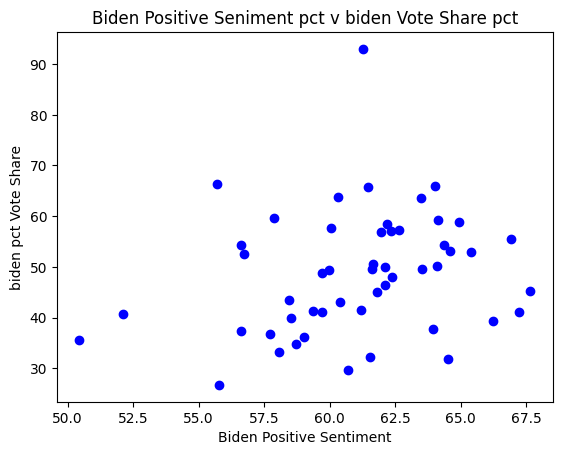

In [ ]:
corr('Biden_Positive','biden_pct')

correlation:0.17960088710183955


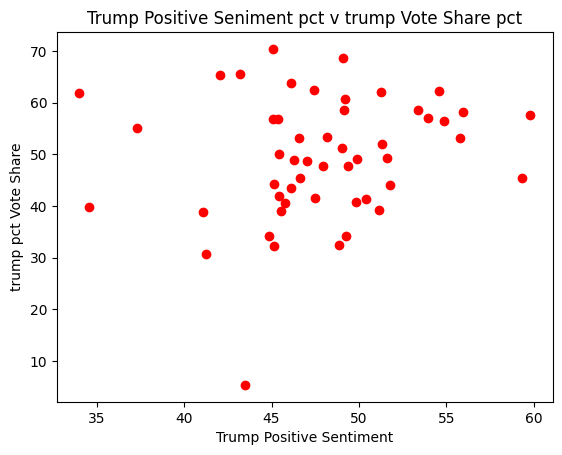

In [ ]:
corr('Trump_Positive','trump_pct')

correlation:0.2533031674208145


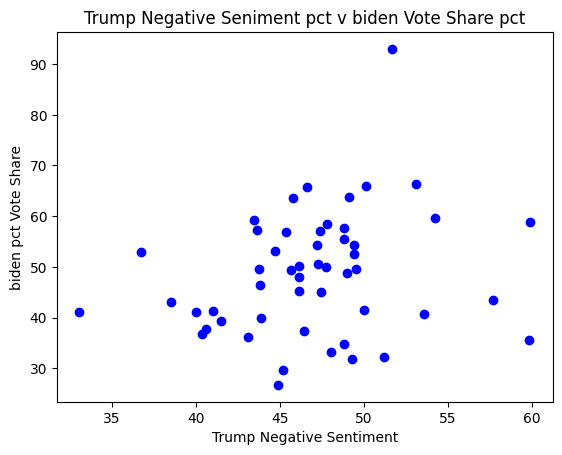

In [ ]:
corr('Trump_Negative','biden_pct')

correlation:0.3218245172759594


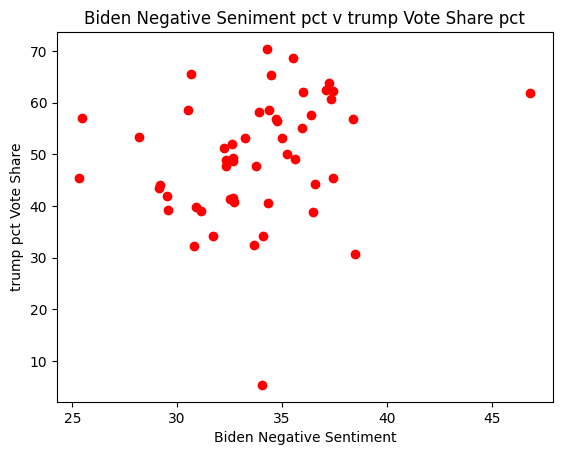

In [ ]:
corr('Biden_Negative','trump_pct')

correlation:-0.2647631117240774


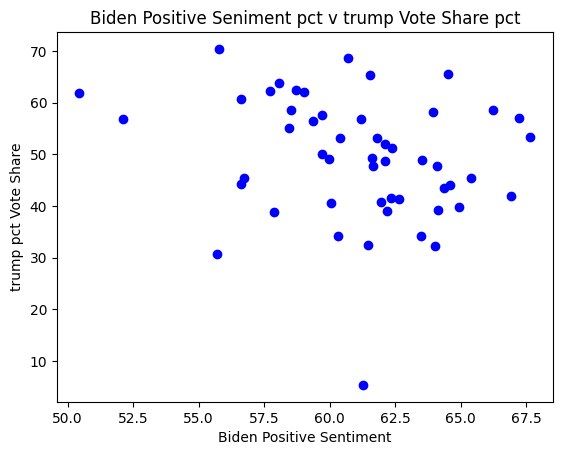

In [ ]:
corr('Biden_Positive','trump_pct')

correlation:-0.18081447963800903


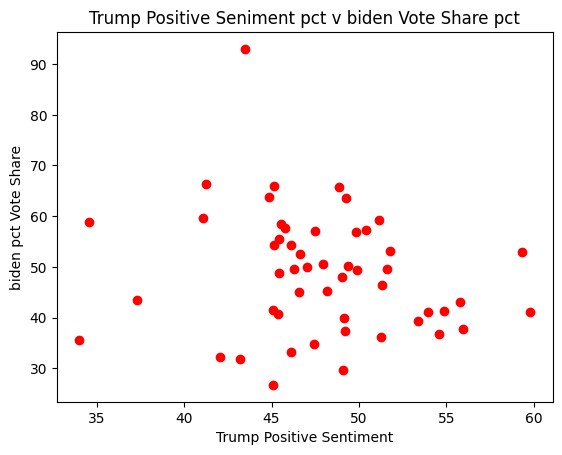

In [ ]:
corr('Trump_Positive','biden_pct')

correlation:0.17960088710183955
correlation:0.2690497737556561


Text(0.5, 1.0, '')

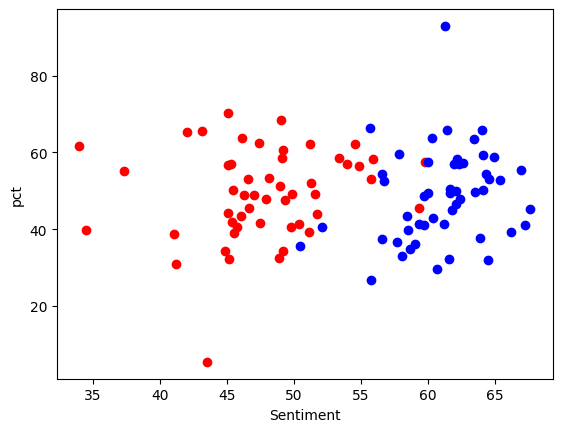

In [ ]:
corr('Trump_Positive','trump_pct')
corr('Biden_Positive','biden_pct')
plt.xlabel('Sentiment')
plt.ylabel('pct')
plt.title('')

In [ ]:
def calc_diff(x,y):
  new_df = df[['state',x,y]]
  new_df['percentage_diff_' + x + "_" + y] = abs(df[x] - df[y])
  new_df = new_df.sort_values(by='state')
  return new_df

In [ ]:
#new_df = calc_diff('Trump_Positive','trump_pct')
#df[['state','Trump_Positive','trump_pct']] == new_df[['state','Trump_Positive','trump_pct']]

In [ ]:
trump_pos = calc_diff('Trump_Positive','trump_pct')
biden_pos = calc_diff('Biden_Positive','biden_pct')
trump_biden_inverse = calc_diff('Trump_Negative','biden_pct')
biden_trump_inverse = calc_diff('Biden_Negative','trump_pct')

<ipython-input-103-9223afcf29e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['percentage_diff_' + x + "_" + y] = abs(df[x] - df[y])
<ipython-input-103-9223afcf29e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['percentage_diff_' + x + "_" + y] = abs(df[x] - df[y])
<ipython-input-103-9223afcf29e1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [ ]:
trump_pos.head(2)


,state,Trump_Positive,trump_pct,percentage_diff_Trump_Positive_trump_pct
0,Alabama,54.595715,62.2,7.604285
1,Alaska,55.802469,53.1,2.702469


In [ ]:
biden_pos.head(2)

,state,Biden_Positive,biden_pct,percentage_diff_Biden_Positive_biden_pct
0,Alabama,57.706627,36.7,21.006627
1,Alaska,60.388821,43.0,17.388821


In [ ]:
trump_biden_inverse.head(2)

,state,Trump_Negative,biden_pct,percentage_diff_Trump_Negative_biden_pct
0,Alabama,40.359364,36.7,3.659364
1,Alaska,38.518519,43.0,4.481481


In [ ]:
biden_trump_inverse.head(2)

,state,Biden_Negative,trump_pct,percentage_diff_Biden_Negative_trump_pct
0,Alabama,37.453462,62.2,24.746538
1,Alaska,34.993925,53.1,18.106075


In [ ]:
col = trump_pos.iloc[:, 3]
col2 = biden_pos.iloc[:, 3]
col3 = trump_biden_inverse.iloc[:, 3]
col4 = biden_trump_inverse.iloc[:, 3]
merged_df = pd.DataFrame([df['state'],col,col2,col3,col4])
merged_df = merged_df.transpose()
merged_df.head()
columns = ['State','Trump+ vs Vote%','Biden+ v Vote%','Trump-  v Biden Vote%','Biden- v Trump Vote%']
merged_df.columns = columns
merged_df.head()


,State,Trump+ vs Vote%,Biden+ v Vote%,Trump- v Biden Vote%,Biden- v Trump Vote%
0,Alabama,7.604285,21.006627,3.659364,24.746538
1,Alaska,2.702469,17.388821,4.481481,18.106075
2,Arizona,0.796212,10.58442,3.73316,13.498857
3,Arkansas,14.994547,23.895652,14.012665,25.307609
4,California,14.931823,0.021511,17.694727,2.598572


In [ ]:
mean_values = merged_df.drop(columns = ['State']).mean()
mean_values

Trump+ vs Vote%           9.133938
Biden+ v Vote%           14.503593
Trump-  v Biden Vote%     9.282963
Biden- v Trump Vote%     17.164242
dtype: object